# knn python实现

In [32]:
#knn,方法1
import numpy as np
import operator
#数据集
def createDataSet():
    group = np.array([[1,101],[5,89],[108,5],[115,8]])#四组二维特征
    labels = ['爱情片','爱情片','动作片','动作片']#四组特征的标签
    return group, labels

dataset, labels = createDataSet()
test_data = [101,20]#测试集

k=3
distances = np.sum((test_data - dataset)**2, axis=1)**0.5#按行
#返回distances中元素从小到大排序后的索引值
sortedDistIndices = distances.argsort()
#定一个记录类别次数的字典
classCount = {}
for i in range(k):
    #取出前k个元素的类别
    voteIlabel = labels[sortedDistIndices[i]]
    #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
    #计算类别次数
    classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
print(sortedClassCount[0][0])

动作片


In [33]:
#knn，方法2
import numpy as np
import operator
import collections
#数据集
def createDataSet():
    group = np.array([[1,101],[5,89],[108,5],[115,8]])#四组二维特征
    labels = ['爱情片','爱情片','动作片','动作片']#四组特征的标签
    return group, labels

dataset, labels = createDataSet()
test_data = [101,20]#测试集

k=3
distances = np.sum((test_data - dataset)**2, axis=1)**0.5#按行
k_labels = [labels[index] for index in distances.argsort()[0:k]]# k个最近的标签
label = collections.Counter(k_labels).most_common(1)[0][0]# 出现次数最多的标签即为最终类别
print(label)

动作片


In [4]:
#整合代码
import numpy as np
import operator
import collections
#数据集
#方法1
def classify0(inx, dataset, labels, k):
    dist = np.sum((inx - dataset)**2, axis=1)**0.5# 计算距离
    k_labels = [labels[index] for index in dist.argsort()[0 : k]]# k个最近的标签
    label = collections.Counter(k_labels).most_common(1)[0][0]# 出现次数最多的标签即为最终类别
    return label

#方法2
def classify1(inx, dataset, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    distances = np.sum((inx - dataset)**2, axis=1)**0.5#按行
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #python3中用items()替换python2中的iteritems()
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

if __name__ == '__main__':
    #创建数据集
    group, labels = createDataSet()
    #测试集
    test = [101,20]
    #kNN分类
    test_class0 = classify0(test, group, labels, 3)
    print(test_class0)
    test_class1 = classify1(test, group, labels, 3)
    print(test_class1)

动作片
动作片


# 约会网站测试

In [2]:
import numpy as np
import os
os.chdir(r'D:\CDA\File')
import pandas as pd
data=pd.read_table('datingTestSet.txt',sep='	',names=['x1','x2','x3','y'])
datingDataMat=data.loc[:,'x1':'x3']
datingLabels=data.loc[:,'y':]
datingLabels.head()

D:\conda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


,y
0,largeDoses
1,smallDoses
2,didntLike
3,didntLike
4,didntLike


In [3]:
#计算错误率
import collections

def classify0(inx, dataset, labels, k):
    dist = np.sum((inx - dataset)**2, axis=1)**0.5# 计算距离
    k_labels = [labels[index] for index in dist.argsort()[0 : k]]# k个最近的标签
    label = collections.Counter(k_labels).most_common(1)[0][0]# 出现次数最多的标签即为最终类别
    return label

data=pd.read_table('datingTestSet.txt',sep='	',names=['x1','x2','x3','y'])
datingData=data.loc[:,'x1':'x3']
datingLabels=data['y']

#数据归一化
df_norm = (datingData - datingData.min()) / (datingData.max() - datingData.min())
errorCount = 0.0
for i in range(100):#前100作为测试，后900个作为训练
	classifierResult = classify0(df_norm.values[i,:], df_norm.values[100:1001,:],list(datingLabels[100:1000]), 4)
	print("分类结果:%s\t真实类别:%s" % (classifierResult, datingLabels[i]))
	if classifierResult is not datingLabels[i]:
		errorCount += 1.0
print("错误率:%f%%" %(errorCount/float(100)*100))

分类结果:largeDoses	真实类别:largeDoses
分类结果:smallDoses	真实类别:smallDoses
分类结果:didntLike	真实类别:didntLike
分类结果:didntLike	真实类别:didntLike
分类结果:didntLike	真实类别:didntLike
分类结果:didntLike	真实类别:didntLike
分类结果:largeDoses	真实类别:largeDoses
分类结果:largeDoses	真实类别:largeDoses
分类结果:didntLike	真实类别:didntLike
分类结果:largeDoses	真实类别:largeDoses
分类结果:didntLike	真实类别:didntLike
分类结果:didntLike	真实类别:didntLike
分类结果:smallDoses	真实类别:smallDoses
分类结果:didntLike	真实类别:didntLike
分类结果:didntLike	真实类别:didntLike
分类结果:didntLike	真实类别:didntLike
分类结果:didntLike	真实类别:didntLike
分类结果:didntLike	真实类别:didntLike
分类结果:smallDoses	真实类别:smallDoses
分类结果:largeDoses	真实类别:largeDoses
分类结果:smallDoses	真实类别:smallDoses
分类结果:didntLike	真实类别:didntLike
分类结果:smallDoses	真实类别:smallDoses
分类结果:largeDoses	真实类别:largeDoses
分类结果:smallDoses	真实类别:smallDoses
分类结果:largeDoses	真实类别:largeDoses
分类结果:smallDoses	真实类别:smallDoses
分类结果:largeDoses	真实类别:largeDoses
分类结果:smallDoses	真实类别:smallDoses
分类结果:didntLike	真实类别:didntLike
分类结果:largeDoses	真实类别:largeDoses
分类结果:didntLike	真实类别:didntLike
分类结果:l

D:\conda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: read_table is deprecated, use read_csv instead.
  # Remove the CWD from sys.path while we load stuff.


# 完整可用系统

In [4]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import os
os.chdir(r'D:\CDA\File')
import collections

def classify0(inx, dataset, labels, k):
    dist = np.sum((inx - dataset)**2, axis=1)**0.5# 计算距离
    k_labels = [labels[index] for index in dist.argsort()[0 : k]]# k个最近的标签
    label = collections.Counter(k_labels).most_common(1)[0][0]# 出现次数最多的标签即为最终类别
    return label

data=pd.read_table('datingTestSet.txt',sep='	',names=['x1','x2','x3','y'])
datingData=data.loc[:,'x1':'x3']
datingLabels=data['y']

#数据归一化
df_norm = (datingData - datingData.min()) / (datingData.max() - datingData.min())


#构建完成可用系统    
ffMiles = float(input("每年获得的飞行常客里程数:"))
precentTats = float(input("玩视频游戏所耗时间百分比:"))
iceCream = float(input("每周消费的冰激淋公升数:"))    

inArr = np.array([ffMiles, precentTats, iceCream])
norminArr = np.array((inArr - datingData.min()) / (datingData.max() - datingData.min()))

classifierResult = classify0(norminArr, df_norm.values, list(datingLabels), 4)
#打印结果
print("你可能%s这个人" %(classifierResult))

D:\conda\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: read_table is deprecated, use read_csv instead.
  


每年获得的飞行常客里程数:34
玩视频游戏所耗时间百分比:43
每周消费的冰激淋公升数:100
你可能largeDoses这个人


# sklearn中的knn

In [66]:
#分类
X = [[0], [1], [2], [3]]
label=['a', 'a', 'b', 'b']

y = [0,0,1,1]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 
print(neigh.predict_proba([[1.1]]))

a=neigh.predict([[1.1]])
print(a)

label[a[0]]

[[0.66666667 0.33333333]]
[0]


'a'

# 鸢尾花分类

In [5]:
#鸢尾花分类
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# 导入鸢尾花数据并查看数据特征
iris = datasets.load_iris()
print('数据量',iris.data.shape)
# 拆分属性数据
iris_X = iris.data
# 拆分类别数据
iris_y = iris.target
iris_train_X , iris_test_X, iris_train_y ,iris_test_y = train_test_split(iris_X, iris_y, test_size=0.2,random_state=0)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris_train_X, iris_train_y)
predict_result=knn.predict(iris_test_X)
print('预测结果',predict_result)
# 计算预测的准确率
print('预测准确率',knn.score(iris_test_X, iris_test_y))

数据量 (150, 4)
预测结果 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
预测准确率 1.0


# 回归树

In [5]:
#回归
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y) 
print(neigh.predict([[1.5]]))

[0.5]


# 波士顿房价预测

In [6]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
# 1、加载数据集
ld = load_boston()
x_train,x_test,y_train,y_test = train_test_split(ld.data,ld.target,test_size=0.25)

In [7]:
# 2、标准化处理
# 特征值处理
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.fit_transform(x_test)
# 目标值进行处理
std_y  = StandardScaler()
y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))

In [8]:
# knn回归
knn=KNeighborsRegressor().fit(x_train,y_train)
knn.score(x_test,y_test)

0.8097566726694192

In [9]:
# LinearRegression
lr=LinearRegression().fit(x_train,y_train)
lr.score(x_test,y_test)

0.7656033699123515

# 学习曲线

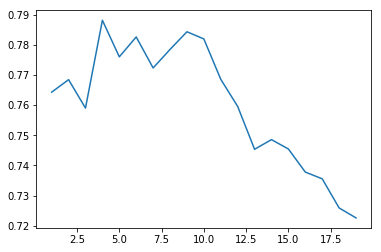

In [10]:
x_train,x_test,y_train,y_test = train_test_split(ld.data,ld.target,test_size=0.25)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.fit_transform(x_test)
# 目标值进行处理
std_y  = StandardScaler()
y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))


krange = range(1,20)
score=[]

for i in krange:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    score.append(knn.score(x_test,y_test))
    
plt.plot(krange,score)
plt.show()

# 交叉验证

In [12]:
from sklearn.model_selection import cross_val_score as CVS
knn = KNeighborsRegressor(n_neighbors=2)
cvresult = CVS(knn,x_train, y_train,cv=5)
cvresult

array([0.77127572, 0.83888444, 0.63297697, 0.66899034, 0.63498958])

In [13]:
cvresult.mean()  # 模型的平均效果

0.7094234089617364

In [14]:
cvresult.var() # 模型是否稳定

0.006721030702572653

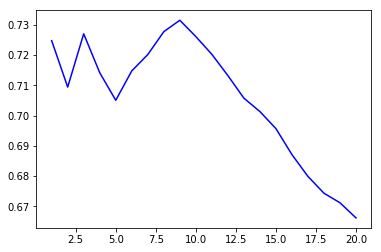

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
score=[]
var_ = []
krange = range(1,21)

for i in krange:
    knn = KNeighborsRegressor(n_neighbors=i)
    cvresult = CVS(knn,x_train, y_train,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange,score,color='b')

# knn手写数字识别

In [16]:
#knn手写数字识别
import numpy as np
from os import listdir
import os
os.chdir(r'D:\CDA\File')
from sklearn.neighbors import KNeighborsClassifier as kNN
 
"""
函数说明:将32x32的二进制图像转换为1x1024向量。
Parameters:
    filename - 文件名
Returns:
    returnVect - 返回的二进制图像的1x1024向量
"""
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    return returnVect
 
"""
函数说明:手写数字分类测试
Parameters:
    无
Returns:
    无
"""
def handwritingClassTest():
    hwLabels = []                                       #测试集的Labels，后面用来比对计算错误率
    trainingFileList = listdir('trainingDigits')        #listdir()是返回目录下的文件名
    m = len(trainingFileList)                           #返回文件夹下文件的个数
    trainingMat = np.zeros((m, 1024))                   #初始化训练的Mat矩阵,测试集，就是批量处理
    for i in range(m):                                  #从文件名中解析出训练集的类别
        fileNameStr = trainingFileList[i]               #获得文件的名字；是为了下一步获取每个文件的数字类别
        classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字；因为分隔后的第一个是代表类别的数字
        hwLabels.append(classNumber)                    #将获得的类别添加到hwLabels中
        trainingMat[i,:] = img2vector('trainingDigits/%s' % (fileNameStr))     #将每一个文件的1x1024数据存储到trainingMat矩阵中，trainingMat最后是m行1024列的矩阵
    neigh = kNN(n_neighbors = 3, algorithm = 'auto')    #构建kNN分类器;第一个指标就是K，第二个指标就是自动搜索适合的算法
    neigh.fit(trainingMat, hwLabels)                    #拟合模型, trainingMat为测试矩阵,hwLabels为对应的标签；这两步就是之前定义的classify那个函数的作用
    testFileList = listdir('testDigits')                #返回testDigits目录下的文件列表   同样也要对测试集进行相同的处理
    errorCount = 0.0                                    #错误检测计数
    mTest = len(testFileList)                           #测试数据的数量
    for i in range(mTest):                              #从文件中解析出测试集的类别并进行分类测试  
        fileNameStr = testFileList[i]                   #获得文件的名字
        classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字
        vectorUnderTest = img2vector('testDigits/%s' % (fileNameStr))     #获得测试集的1x1024向量,用于训练
        classifierResult = neigh.predict(vectorUnderTest)    #获得预测结果；# classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        #print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber)) 
        if(classifierResult != classNumber):
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))
 

if __name__ == '__main__':
    handwritingClassTest()#1.268%

总共错了12个数据
错误率为1.268499%
